# ML CASE-STUDIES | NATURAL LANGUAGE PROCESSING (NLP)

# Importing Libraries

In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# Resturant Reviews | Sentiment Analysis (NLP Case-study)

Dataset Source: https://www.kaggle.com/datasets/maher3id/restaurant-reviewstsv

In [59]:
data= pd.read_csv('Restaurant_Reviews.tsv',sep='\t')# اي ان الكلمات مفصول بينها بال tab
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [60]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

# Explorng Data

In [61]:
data['Liked'].value_counts() # نرى ان الداتا في المخرجات متوازنة 

Liked
1    500
0    500
Name: count, dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

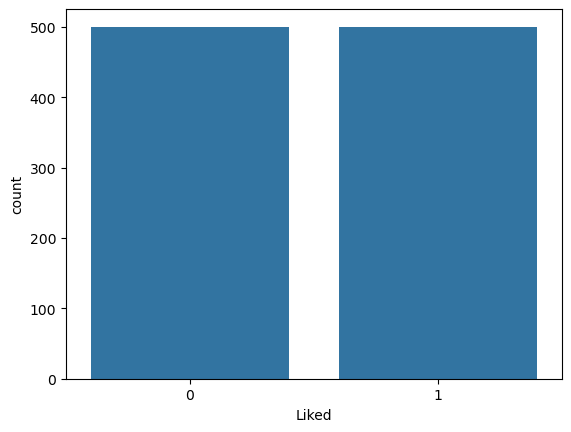

In [62]:
sns.countplot(x=data['Liked'])

In [63]:
# نشوف طول السلسة النصية لقيم العمود review 
data['Review'].apply(len)


0       24
1       18
2       41
3       87
4       59
      ... 
995     66
996     24
997     50
998     91
999    134
Name: Review, Length: 1000, dtype: int64

In [64]:
# سنضيف عمود اخر للداتا يحتوي على عدد الحروف لكل review
data['Review Letter Count']=data['Review'].apply(len)
data

,Review,Liked,Review Letter Count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [65]:
# لمعرفة اطول review
data['Review Letter Count'].max() # لكن هذه التعليمة اعطتني القيمة ونحن هنا لا نريد القيمة لذا 
data['Review Letter Count'].idxmax()# وهذه التعليمة ستعطيني ال index لها
# data.iloc[data['Review Letter Count'].idxmax()].iloc[0] # هذه هي التعليمة المطلوبه 
data.iloc[data['Review Letter Count'].idxmax(), 0] # هذه هي التعليمة المطلوبه 

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

# Pre-processing Data (NLTK Text Data Cleaning)

In [66]:
# "He plays well!"
# "He plays well"
# "He" "play" "good"
# [0,1,0,1,1,0] [1,0,0,0,1] [.......]

In [67]:
data['Review'][0]

'Wow... Loved this place.'

In [68]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
import nltk
from nltk.corpus import stopwords


In [70]:
# nltk.corpus('stopwords')
# هنا اذا واجهنا مشكله وهو عدم القدرة على تحميل المكتبه فنقوم بتحميلها واضافتها بشكل يدوي 
# رابط التحميل: stopwords.zip
# https://github.com/nltk/nltk_data/blob/gh-pages/packages/corpora/stopwords.zip
# ثم فتح المجلد المضغوط في المسار المناسب

In [71]:

# لاختبار المكتبه هل تم تضمينها 
try:
    # نحدد للمكتبة مكان البحث يدوياً للتأكد
    path_to_check = r'C:\Users\Loay_Alrazi\AppData\Roaming\nltk_data'
    if path_to_check not in nltk.data.path:
        nltk.data.path.append(path_to_check)
    
    # محاولة قراءة الكلمات
    stop_words = set(stopwords.words('english'))
    print("✅ تم التعرف على الكلمات بنجاح!")
    print(f"عينة: {list(stop_words)[:5]}")
except Exception as e:
    print(f"❌ لا تزال هناك مشكلة في المسار: {e}")

✅ تم التعرف على الكلمات بنجاح!
عينة: ['most', 'my', 'an', 'at', 'where']


In [72]:
(stopwords.words('english'))

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [73]:
# حاليا نريد ان نبحث عن اي كلمه تكون مطابقة لهذه الكلمات التي لا نحتاجها 
#  splitوسنقوم بتقسيم الجمل الى كلمات عبر التعليمة 
#lowerلذا سنقوم بتحويل كل الجمل الى    
# ايضا نحن لا نحتاج للارقام والرموز في الجمل لذا سنستخدم مكتبه re

In [74]:
# نقوم بتطبيق كل ما سبق على جملة واحدة لنلاحظ التغيرات

In [75]:
s = data['Review'][0]

In [76]:
import re 
s=re.sub('[^a-zA-Z]'," ",s)# ^ عكس المكتوب

In [77]:
s=s.lower()
s

'wow    loved this place '

In [78]:
s = s.split()
s

['wow', 'loved', 'this', 'place']

In [79]:
temp = []
for word in s:
    if word not in stopwords.words('english'):
        temp.append(word)
temp

['wow', 'loved', 'place']

In [80]:
# الكود السابق بصيغة أخرى
[word for word in s if word not in stopwords.words('english')]

['wow', 'loved', 'place']

In [81]:
s = ' '.join(temp)
s

'wow loved place'

In [82]:
from nltk.stem import PorterStemmer


In [83]:
ps = PorterStemmer()

In [84]:
s = ps.stem(s)
s

'wow loved plac'

In [85]:
# vectors تحويل النص الى

In [86]:
from sklearn.feature_extraction.text import CountVectorizer


In [87]:
cv = CountVectorizer()

In [88]:
cv.fit_transform(s.split()).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=int64)

In [89]:
#  الى هنا اصبح الكود جاهزا لذا الان سنطبق كل هذا على الجمل ككل  

In [90]:
corpus = []

for i in range(len(data)):
    s = re.sub('[^a-zA-Z]'," ",data['Review'][i])
    s = s.lower()
    s = s.split()
    s = [word for word in s if word not in stopwords.words('english')]
    s = ' '.join(s)
    s = ps.stem(s)
    corpus.append(s)

corpus    

['wow loved plac',
 'crust good',
 'tasty texture nasti',
 'stopped late may bank holiday rick steve recommendation lov',
 'selection menu great pric',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warm',
 'fries great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpr',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked signs indicate cash',
 'highly recommend',
 'waitress little slow servic',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amaz',
 'service also cut',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street tacos friendly staff',
 'took hour get food tables restaurant food luke warm sever running around like totally overwhelm',
 'worst salmon sashimi',
 'also combos like burger fries beer dec

In [91]:
cv = CountVectorizer()

In [92]:
cv.fit_transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [93]:
cv.fit_transform(corpus).toarray().shape

(1000, 1994)

In [94]:
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [95]:
y = data['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [138]:
X_train.shape

(670, 1994)

In [139]:
X_test.shape

(330, 1994)

# Model Training & Building

In [140]:
from sklearn.naive_bayes import MultinomialNB

In [141]:
clf = MultinomialNB() #clf = classifier

In [142]:
clf.fit(X_train, y_train)

MultinomialNB()

# Model Prediction

In [143]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [144]:
y_test.values

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,

# Model Evaluation

In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [146]:
print(confusion_matrix(y_test, y_pred))

[[116  57]
 [ 32 125]]


In [147]:
print(accuracy_score(y_test, y_pred))

0.7303030303030303


In [136]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       205
           1       0.70      0.81      0.75       195

    accuracy                           0.74       400
   macro avg       0.75      0.74      0.74       400
weighted avg       0.75      0.74      0.74       400



# Model Deplovment & Production

In [109]:
import joblib

In [110]:
joblib.dump(clf,'resturants.pkl')

['resturants.pkl']

In [111]:
loaded = joblib.load('resturants.pkl')

In [112]:
# loaded.predict()
# .........

In [113]:
# تجربة النموذج بمراجعة جديدة من اختيارك
def predict_review(new_review):
    # 1. تنظيف النص (نفس خطوات المعالجة السابقة)
    
    import re
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not') # نبقي كلمة not لأنها تغير المعنى
    new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    
    # 2. تحويل النص إلى أرقام (Vectorization)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    
    # 3. التوقع
    prediction = clf.predict(new_X_test)
    
    if prediction[0] == 1:
        return "👍 Positive Review"
    else:
        return "👎 Negative Review"

# جرب كتابة أي تعليق هنا
test_review = "The food was absolutely amazing and the service was great!"
print(f"Review: {test_review}")
print(f"Result: {predict_review(test_review)}")

Review: The food was absolutely amazing and the service was great!
Result: 👍 Positive Review


# THANK YOU!